In [2]:
import xgboost as xgb

In [3]:
import eli5

2021-12-17 10:02:39.439511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-17 10:02:39.439573: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline


In [6]:
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances

In [37]:
perm = PermutationImportance(model).fit(X_test,y_test)

In [38]:
list(X_test.columns)

['Number words female',
 'Total words',
 'Number of words lead',
 'Difference in words lead and co-lead',
 'Number of male actors',
 'Year',
 'Number of female actors',
 'Number words male',
 'Gross',
 'Mean Age Male',
 'Mean Age Female',
 'Age Lead',
 'Age Co-Lead']

In [39]:
eli5.show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0875 ± 0.0324,Number of female actors
0.0461 ± 0.0140,Number of male actors
0.0426 ± 0.0267,Number words female
0.0327 ± 0.0200,Age Co-Lead
0.0315 ± 0.0403,Age Lead
0.0274 ± 0.0179,Difference in words lead and co-lead
0.0204 ± 0.0224,Mean Age Male
0.0204 ± 0.0098,Number words male
0.0181 ± 0.0125,Total words
0.0117 ± 0.0138,Mean Age Female


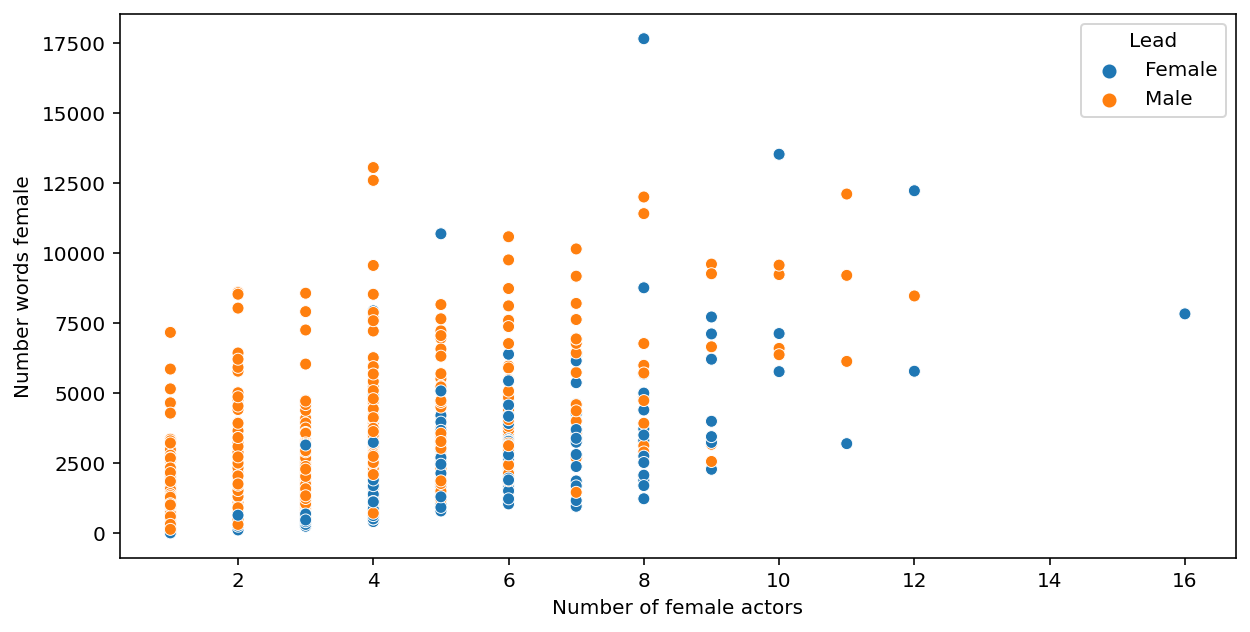

In [42]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Number of female actors', y='Number words female', hue="Lead", data=df_tr, ax=ax);

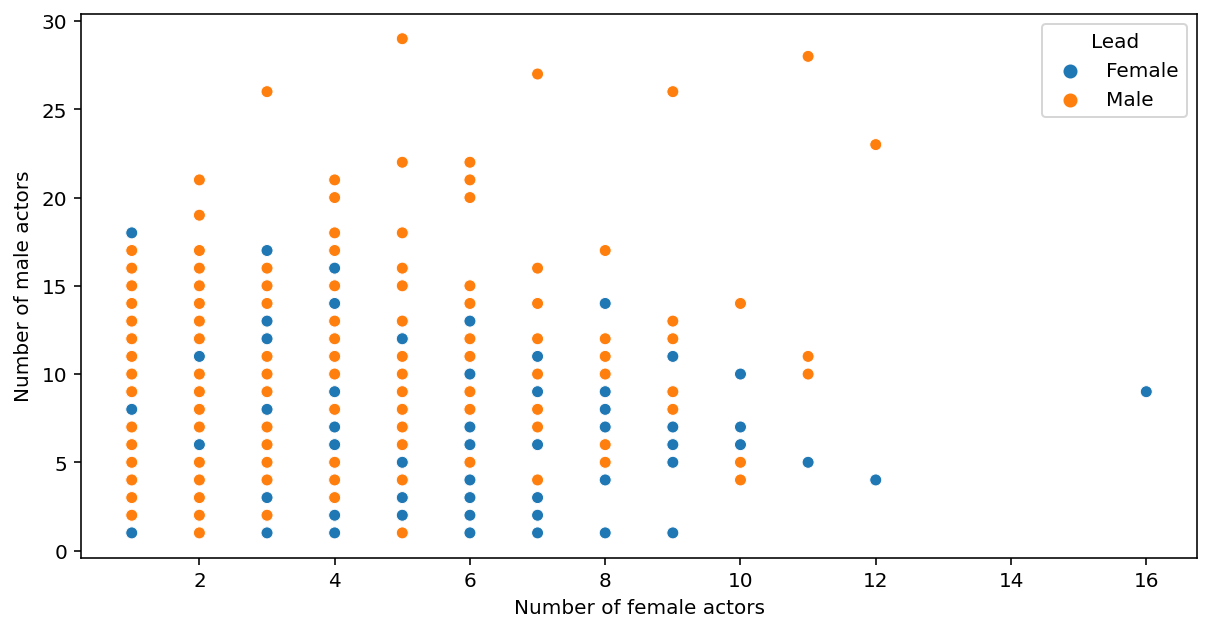

In [41]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Number of female actors', y='Number of male actors', hue="Lead", data=df_tr, ax=ax);

In [0]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Number of female actors', y='Number words female', hue="Lead", data=df_tst, ax=ax);

In [9]:
df_tr = pd.read_csv("train.csv")
df_tst = pd.read_csv("test.csv")
df_tr.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [10]:
df_tst.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,669,5388,2564.0,2241,8,2005,3,2155,46.0,33.571429,31.0,50.0,18.0
1,161,3468,1347.0,1186,5,2001,1,1960,278.0,39.600000,34.0,54.0,34.0
2,1720,14712,2818.0,2231,18,2008,5,10174,53.0,35.615385,40.0,23.0,28.0
3,3342,24930,11204.0,9912,13,2001,6,10384,81.0,40.416667,30.2,38.0,27.0
4,1520,14676,4378.0,2858,6,1992,1,8778,131.0,33.833333,34.0,46.0,34.0


In [11]:
df_tr[df_tr.columns[:-1]]

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,303,2398,1334.0,1166,5,1973,2,761,174.0,43.200000,31.000000,46.0,24.0
1035,632,8404,1952.0,187,6,1992,2,5820,172.0,37.166667,24.000000,21.0,34.0
1036,1326,2750,877.0,356,2,2000,3,547,53.0,27.500000,27.666667,28.0,25.0
1037,462,3994,775.0,52,8,1996,3,2757,32.0,42.857143,38.500000,29.0,32.0


In [12]:
y_tr = df_tr["Lead"]
x_tr = df_tr[df_tr.columns[:-1]]

In [13]:
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 3, 31, 4
for i in range(tree_depth_start, tree_depth_end, steps):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=x_tr, y=y_tr, cv=10, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()


In [14]:
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

The best depth was found to be: 3


In [36]:
#Test and train for train ds
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.33, random_state=42)

In [16]:
#Evalaute the performance at the best depth for tree classifier
model_tree = DecisionTreeClassifier(max_depth=best_depth)
model_tree.fit(X_train, y_train)

#Check Accuracy of Train and Test Set
acc_trees_training = accuracy_score(y_train, model_tree.predict(X_train))
acc_trees_testing  = accuracy_score(y_test,  model_tree.predict(X_test))

print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(acc_trees_testing))


Simple Decision Trees: Accuracy, Training Set 	 : 80.46%
Simple Decision Trees: Accuracy, Testing Set 	 : 78.72%


In [17]:
#Fit a Random Forest Model

new_depth = best_depth + 20 

#Training
model = RandomForestClassifier(n_estimators=int(X_train.shape[1]/2), max_depth=new_depth)
model.fit(X_train, y_train)

#Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Perfromance Evaluation
acc_random_forest_deeper_training = accuracy_score(y_train, y_pred_train)*100
acc_random_forest_deeper_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set (Deeper): {:0.2f}%".format(acc_random_forest_deeper_training))
print("Random Forest: Accuracy, Testing Set (Deeper):  {:0.2f}%".format(acc_random_forest_deeper_testing))



Random Forest: Accuracy, Training Set (Deeper): 97.84%
Random Forest: Accuracy, Testing Set (Deeper):  80.47%


In [18]:
print("Training Accuracies:")
print("Decision Trees:\tAccuracy, Training Set \t: {:.2%}".format(acc_trees_training))
print("Bagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Random Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_training))
print("RF Deeper: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_random_forest_deeper_training))

Training Accuracies:
Decision Trees:	Accuracy, Training Set 	: 80.46%


NameError: name 'acc_bagging_training' is not defined

In [19]:
from itertools import product

In [20]:
from itertools import product
from collections import OrderedDict
param_dict = OrderedDict(
    n_estimators = [400, 600, 800],
    max_features = [0.2, 0.4, 0.6, 0.8]
)

In [21]:
results = {}
estimators= {}
for ntrees, maxf in product(*param_dict.values()):
    params = (ntrees, maxf)
    est = RandomForestClassifier(oob_score=True, 
                                n_estimators=ntrees, max_features=maxf, max_depth=50, n_jobs=-1)
    est.fit(X_train, y_train)
    results[params] = est.oob_score_
    estimators[params] = est
outparams = max(results, key = results.get)
outparams

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(400, 0.8)

In [22]:
rf1 = estimators[outparams]

In [23]:
results

{(400, 0.2): 0.8232758620689655,
 (400, 0.4): 0.8318965517241379,
 (400, 0.6): 0.8362068965517241,
 (400, 0.8): 0.8376436781609196,
 (600, 0.2): 0.8175287356321839,
 (600, 0.4): 0.8376436781609196,
 (600, 0.6): 0.8318965517241379,
 (600, 0.8): 0.8347701149425287,
 (800, 0.2): 0.8247126436781609,
 (800, 0.4): 0.8304597701149425,
 (800, 0.6): 0.8318965517241379,
 (800, 0.8): 0.8376436781609196}

In [24]:
rf1.score(X_test, y_test)

0.8367346938775511

<AxesSubplot:>

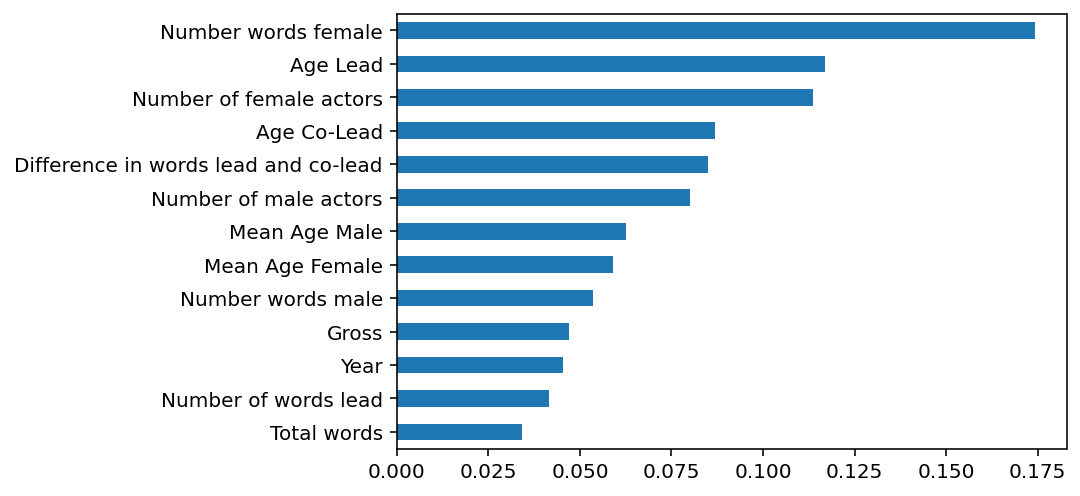

In [25]:
#Feature Importance (Gini) for RF
pd.Series(rf1.feature_importances_,index=list(X_train)).sort_values().plot(kind="barh")

In [26]:
import seaborn as sns

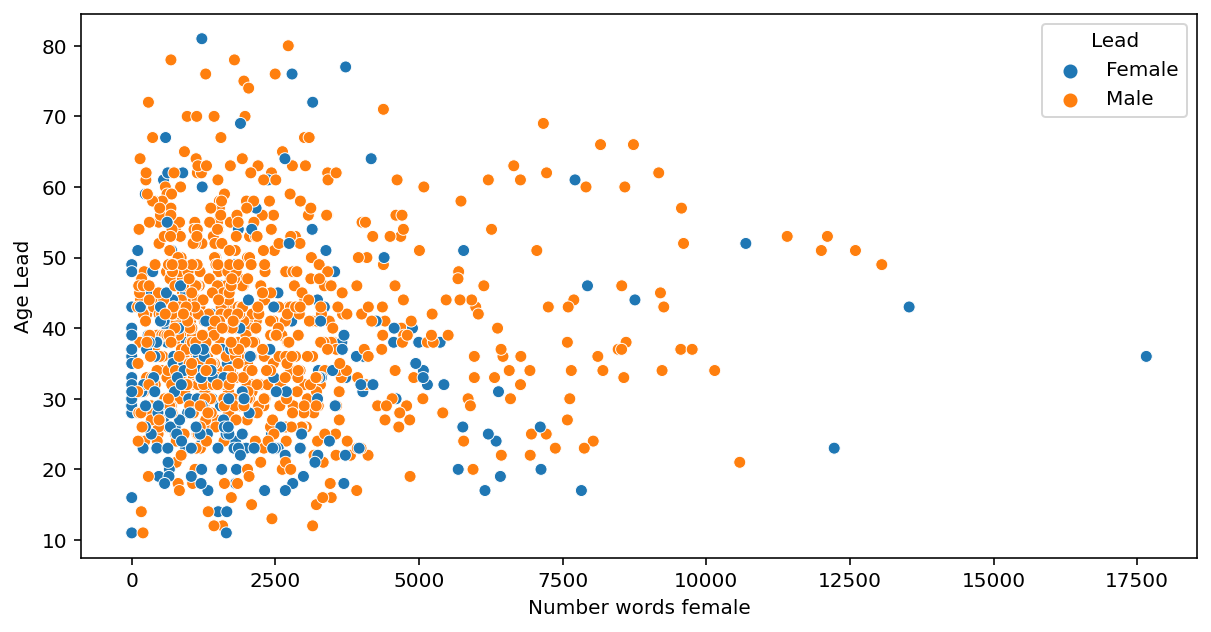

In [27]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="Number words female", y="Age Lead", hue="Lead", data=df_tr, ax=ax);

In [28]:
#label encoding for XGBoost
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)


In [30]:
import time
# Create the training and test data
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters
param = {
    'max_depth': best_depth,  # the maximum depth of each tree
    'eta': 0.3,               # the training step for each iteration
    'silent': 1,              # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}           # the number of classes that exist in this datset

# Number of training iterations
num_round = 200  

# Start timer
start = time.time()

# Train XGBoost
bst = xgb.train(param, 
                dtest, 
                num_round, 
                evals= [(dtrain, 'train')], 
                early_stopping_rounds=20, # early stopping
                verbose_eval=20)


# Make prediction training set
preds_train = bst.predict(dtrain)
best_preds_train = np.asarray([np.argmax(line) for line in preds_train])

# Make prediction test set
preds_test = bst.predict(dtest)
best_preds_test = np.asarray([np.argmax(line) for line in preds_test])

# Performance Evaluation 
acc_XGBoost_training = accuracy_score(y_train, best_preds_train)*100
acc_XGBoost_test = accuracy_score(y_test, best_preds_test)*100

# Stop Timer
end = time.time()
elapsed_xgboost = end - start

print("XGBoost:\tAccuracy, Training Set \t: {:0.2f}%".format(acc_XGBoost_training))
print("XGBoost:\tAccuracy, Testing Set \t: {:0.2f}%".format(acc_XGBoost_test))


[10:04:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-merror:0.20833


Will train until train-merror hasn't improved in 20 rounds.


[20]	train-merror:0.16523


[40]	train-merror:0.15948


Stopping. Best iteration:
[24]	train-merror:0.15374



XGBoost:	Accuracy, Training Set 	: 84.63%
XGBoost:	Accuracy, Testing Set 	: 100.00%
